# Programming with Self-Attention

This notebook is based on the [blog post by Sasha Rush](https://srush.github.io/raspy/).

In [ ]:
!pip install -qqq git+https://github.com/chalk-diagrams/chalk git+https://github.com/srush/RASPy 

In [ ]:
from raspy import *
import raspy.visualize
from chalk import *

# Where We're Going

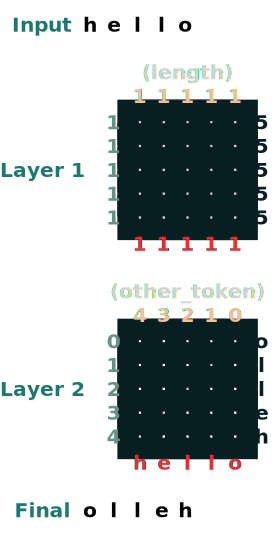

In [ ]:
raspy.visualize.EXAMPLE = 'hello'
def flip():
    length = (key(1) == query(1)).value(1).name("length")
    flipped = (key(length - indices - 1) == query(indices)).value(tokens).name("other_token")
    return flipped
flip()

# Section 1: Feed-Forward Network

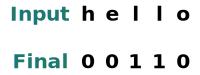

In [ ]:
(tokens == 'l')

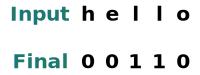

In [ ]:
((indices > 1) & (indices <= 3))

`where` does a functional, vectorized `if`-`then`-`else`:

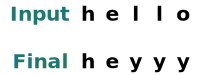

In [ ]:
where(indices >= 2, "y", tokens)

### Exercise

- Replace every 'e' with 'A'
- Replace the first token with 'B'
- For everything else (i.e., that isn't an e or the first token) output 'C'

For "hello", we should output "BACCC". I needed two `where` expressions to do this.

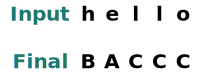

In [ ]:
# your code here

# Section 2: Keys and Queries

In [ ]:
key(tokens)

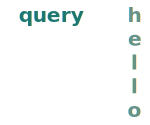

In [ ]:
query(tokens)

Comparing keys with queries gives a matrix of the results. (Unlike self-attention in Transformers, the results can only be 0 or 1. But we can use any operation, like `==` or `<`.)

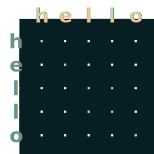

In [ ]:
key(tokens) == query(tokens)

Scalars broadcast to the length of the sequence.

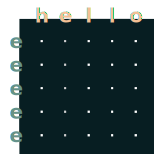

In [ ]:
key(tokens) == query('e')

**Understanding check**: why is the following different?

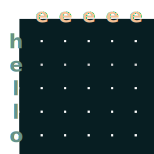

In [ ]:
key('e') == query(tokens)

**Example**: Count `e`s.

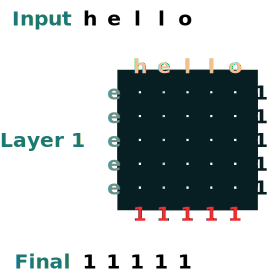

In [ ]:
(key(tokens) == query('e')).value(1)

## Exercise

Count `l`s instead.

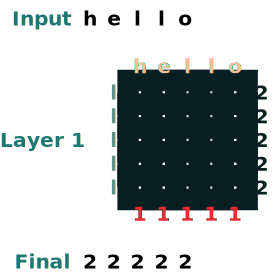

In [ ]:
# your code here

## Exercise

Explain to your partners what the values on the *top* and *left* of the grid mean. (You might also think about the bottom and right values, but don't worry if you don't get them quite yet.)

Exercise: predict the result of the following cell. Discuss your prediction with your partners. Then, uncomment it and check your prediction. Discuss what you learned.

In [ ]:
# (key('e') == query(tokens)).value(1)

Exercise: `length`.

1. Explain to your partners: why does the following code compute the length of the input sequence?
2. Change it so that only the first token gets the sequence length. Hint: use `indices`.

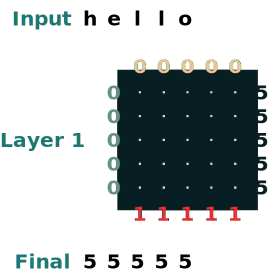

In [ ]:
(key(0) == query(0)).value(1)

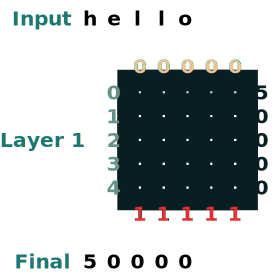

In [ ]:
# your code here

**Example**: using a different input sequence

By default, the visualization shows the result of running your expression on the example sequence, `raspy.visualize.EXAMPLE`. But we can use a different sequence, either by changing the example or by supplying it explicitly.  

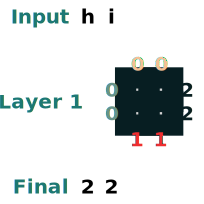

In [ ]:
raspy.visualize.EXAMPLE = 'hi'
result = (key(0) == query(0)).value(1)
result

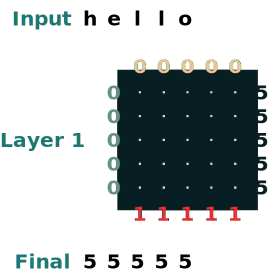

In [ ]:
# Notice, we're not changing `result`.
result.input("hello")

In [ ]:
# set it back.
raspy.visualize.EXAMPLE = 'hello'

### Exercise: **histogram**.

For each token, output how many times that token occurs in the sequence.

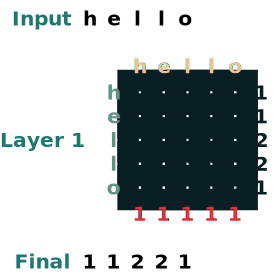

In [ ]:
# your code here

Example: a selector that matches each output position to all earlier input positions.

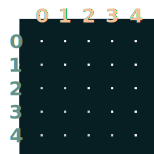

In [ ]:
before = key(indices) < query(indices)
before

# Section 3: Values (other than 1)

To show you this, we'll need to explicitly provide input to the network, rather than relying on the `EXAMPLE`. (The default behavior is as if the cell ended in `result.input(raspy.visualize.EXAMPLE)`.)

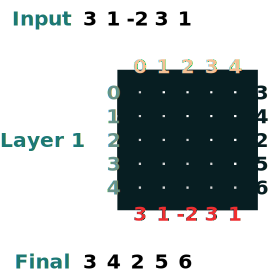

In [ ]:
cumsum = (key(indices) <= query(indices)).value(tokens)
cumsum.input([3, 1, -2, 3, 1])

Exercise: Explain to your partner(s) what the values on the *bottom* and *right* of the grid mean.

## Exercise: pattern detect

Detect all instances of vowel-consonant. That is, each token outputs a 1 if it is a consonant that was preceded by a vowel, and 0 otherwise. So:

output = (my_left_neighbor_is_vowel) & (i_am_not_a_vowel)

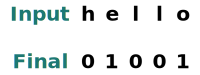

In [ ]:
raspy.visualize.EXAMPLE = 'hello'
vowel = tokens.map(lambda tok: tok in 'aeiou')
vowel

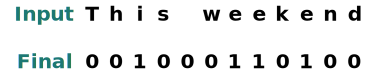

In [ ]:
raspy.visualize.EXAMPLE = list("This weekend")
vowel

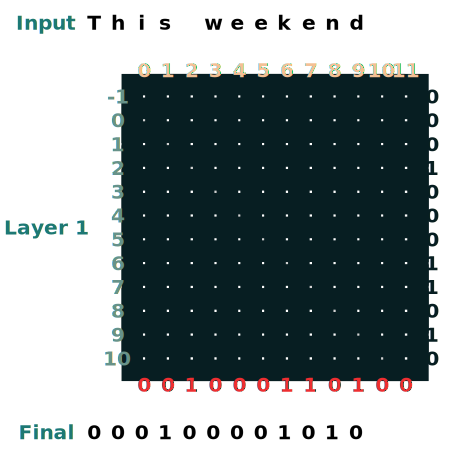

In [ ]:
# your code here